# Introduction 
The amount of solar radiation on a given day is a useful indicator of how much energy can be produced using solar panels. In this notebook you will explore how to build a model that will predict the amount of radiation from other weather readings.

## Importing libraries and data

* Run the code in the boxes below to import the libraries and data.

In [1]:
# import pandas and seaborn
import pandas as pd 
import seaborn as sns

# import functions from sklearn for modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import data
solar_data = pd.read_csv('reading-climate-solar-19-20.csv')

# display to check
solar_data

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation
0,2019,1,1,1034.9,9.6,6.1,7.8,7,2.1,0.2,1.75
1,2019,1,2,1044.1,5.5,0.9,3.2,8,0.9,0.0,1.65
2,2019,1,3,1043.6,4.2,3.2,3.7,7,0.8,0.0,1.51
3,2019,1,4,1043.7,3.6,-2.5,0.6,5,0.0,5.0,4.27
4,2019,1,5,1039.9,6.3,-1.7,2.3,8,1.9,0.0,0.84
...,...,...,...,...,...,...,...,...,...,...,...
726,2020,12,27,976.4,7.1,4.5,5.8,5,2.2,4.3,3.49
727,2020,12,28,971.9,3.0,-1.4,0.8,7,1.1,0.0,1.3
728,2020,12,29,988.3,4.9,-0.6,2.2,8,0.0,0.6,1.59
729,2020,12,30,1003.1,4.9,-0.9,2.0,4,1.1,2.0,2.93


The data set contains daily climate and weather data recorded for Reading (UK) for the years 2019-2022. It includes a reading for the solar radiation.

There are 731 individual daily records.

Features:
* **year**
* **month**: *Month of the year: 1 for January, ... 12 for December*
* **day**: *1-31*
* **MSL pressure**: *Mean sea level air pressure (millibars)*
* **Maximum temperature**: *Daily maximum temperature (°C)*
* **Minimum temperature**: *Daily minimum temperature (°C)*
* **Mean air temperature**: *Daily mean temperature (°C)*
* **Cloud cover**: *Proportion of sky covered by cloud (oktas or eighths of the sky)*
* **Wind speed**: *Average wind speed for the day (m/s)*
* **Sunshine duration**: *Total time for the sun shining for the day (hours)*
* **Total solar radiation**: *Amount of energy absorbed in a square metre (MJ/m²)*

# Pre-processing the data 1

> Run the code in the box below to explore the data types.

In [3]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   731 non-null    int64  
 1   month                  731 non-null    int64  
 2   day                    731 non-null    int64  
 3   MSL pressure           731 non-null    float64
 4   Maximum temperature    731 non-null    float64
 5   Minimum temperature    731 non-null    float64
 6   Mean air temperature   731 non-null    float64
 7   Cloud cover            731 non-null    int64  
 8   Wind speed             731 non-null    float64
 9   Sunshine duration      731 non-null    float64
 10  Total solar radiation  731 non-null    object 
dtypes: float64(6), int64(4), object(1)
memory usage: 62.9+ KB


The `Total solar radiation` feature has been imported as an `object` data type.

In [4]:
solar_data['Total solar radiation'].describe()

count     731
unique    610
top         x
freq       16
Name: Total solar radiation, dtype: object

The most common value for `Total solar radiation` is `x`. These rows can be displayed using the code below.

In [5]:
solar_data[solar_data['Total solar radiation'] == 'x']

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation
84,2019,3,26,1035.0,13.7,-0.1,6.8,2,1.8,10.3,x
97,2019,4,8,1011.1,11.5,7.2,9.3,8,0.9,0.0,x
153,2019,6,3,1013.1,20.1,9.0,14.6,5,3.0,9.1,x
196,2019,7,16,1019.7,25.9,9.8,17.9,1,1.0,13.0,x
225,2019,8,14,1014.4,18.9,13.5,16.2,8,3.7,0.0,x
244,2019,9,2,1024.1,21.3,7.4,14.4,1,2.5,7.7,x
253,2019,9,11,1019.3,20.7,12.9,16.8,7,2.4,1.5,x
267,2019,9,25,999.0,20.5,14.3,17.4,8,3.0,3.5,x
281,2019,10,9,1005.1,14.9,9.4,12.2,7,3.8,3.6,x
294,2019,10,22,1024.9,15.2,4.1,9.6,0,0.6,6.5,x


> Run the code in the box below to create a new numeric feature based on `Total solar radiation`. Entries that can't be converted to a number will be `NaN` - 'Not a number'.

In [6]:
# create a new numeric feature by converting text to numeric where possible
solar_data['Solar value'] = pd.to_numeric(solar_data['Total solar radiation'], errors='coerce')

# check the data set
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   731 non-null    int64  
 1   month                  731 non-null    int64  
 2   day                    731 non-null    int64  
 3   MSL pressure           731 non-null    float64
 4   Maximum temperature    731 non-null    float64
 5   Minimum temperature    731 non-null    float64
 6   Mean air temperature   731 non-null    float64
 7   Cloud cover            731 non-null    int64  
 8   Wind speed             731 non-null    float64
 9   Sunshine duration      731 non-null    float64
 10  Total solar radiation  731 non-null    object 
 11  Solar value            715 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 68.7+ KB


The next code block makes a new cleaned data set by removing any rows that have `NaN`

In [7]:
# create a cleaned data set without the problem rows
solar_data_clean = solar_data.dropna()

# check the data
solar_data_clean

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation,Solar value
0,2019,1,1,1034.9,9.6,6.1,7.8,7,2.1,0.2,1.75,1.75
1,2019,1,2,1044.1,5.5,0.9,3.2,8,0.9,0.0,1.65,1.65
2,2019,1,3,1043.6,4.2,3.2,3.7,7,0.8,0.0,1.51,1.51
3,2019,1,4,1043.7,3.6,-2.5,0.6,5,0.0,5.0,4.27,4.27
4,2019,1,5,1039.9,6.3,-1.7,2.3,8,1.9,0.0,0.84,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2020,12,27,976.4,7.1,4.5,5.8,5,2.2,4.3,3.49,3.49
727,2020,12,28,971.9,3.0,-1.4,0.8,7,1.1,0.0,1.3,1.30
728,2020,12,29,988.3,4.9,-0.6,2.2,8,0.0,0.6,1.59,1.59
729,2020,12,30,1003.1,4.9,-0.9,2.0,4,1.1,2.0,2.93,2.93


The data types and the new column should be checked to confirm they have been created correctly.

In [8]:
solar_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 730
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   715 non-null    int64  
 1   month                  715 non-null    int64  
 2   day                    715 non-null    int64  
 3   MSL pressure           715 non-null    float64
 4   Maximum temperature    715 non-null    float64
 5   Minimum temperature    715 non-null    float64
 6   Mean air temperature   715 non-null    float64
 7   Cloud cover            715 non-null    int64  
 8   Wind speed             715 non-null    float64
 9   Sunshine duration      715 non-null    float64
 10  Total solar radiation  715 non-null    object 
 11  Solar value            715 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 72.6+ KB


In [9]:
solar_data_clean['Solar value'].describe()

count    715.000000
mean      10.908112
std        8.064077
min        0.540000
25%        3.600000
50%        8.980000
75%       17.500000
max       29.950000
Name: Solar value, dtype: float64


# Exploratory data analysis

## Using `pairplot`
Before building a model it can be helpful to explore all the possible scatter diagrams with `Total solar radiation` on the y-axis.

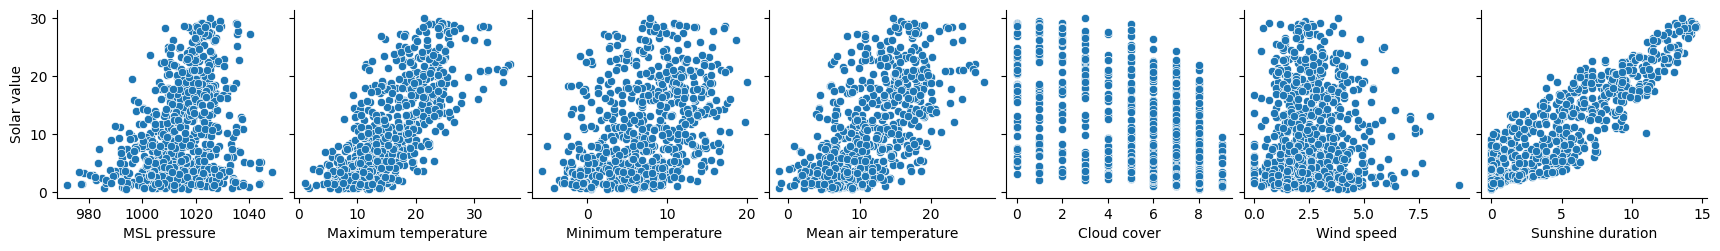

In [10]:
# plot all possible scatter diagrams
features = ['MSL pressure', 'Maximum temperature' , 'Minimum temperature', 'Mean air temperature', 'Cloud cover', 'Wind speed', 'Sunshine duration']
sns.pairplot(solar_data_clean, x_vars=features, y_vars=['Solar value'], diag_kind=None);

`Maximum temperature`, `Mean air temperature` and `Sunshine duration` show some association. Individual scatter diagrams are shown for these below.

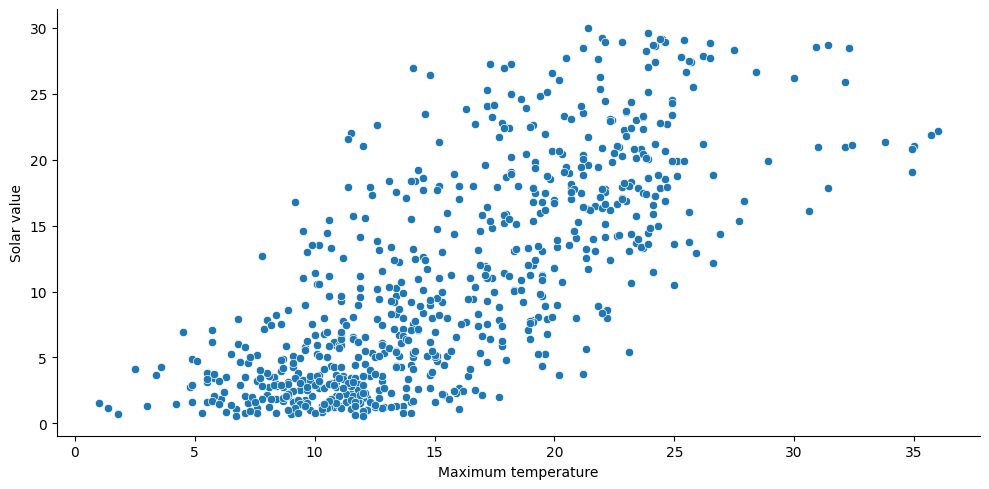

In [11]:
# create a scatter plot
sns.relplot(data=solar_data_clean, x="Maximum temperature", y="Solar value", aspect=2);

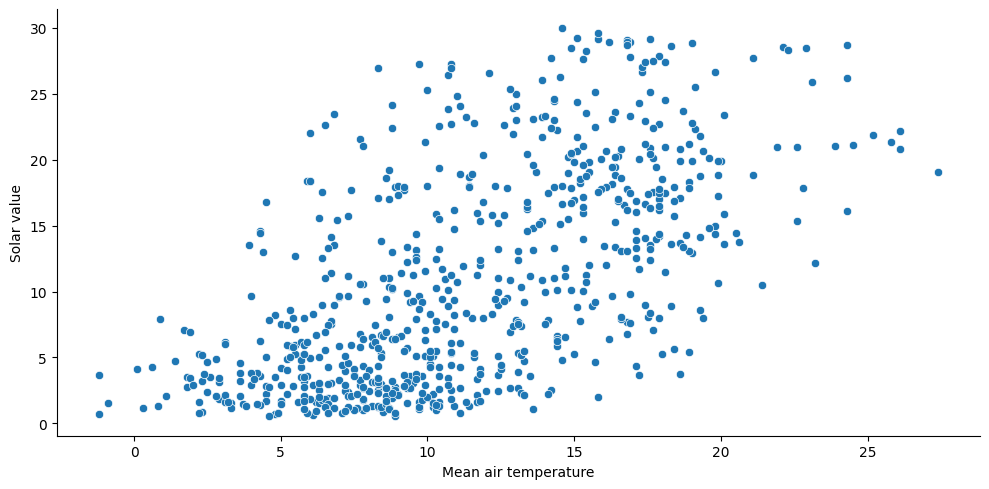

In [12]:
# create a scatter plot
sns.relplot(data=solar_data_clean, x="Mean air temperature", y="Solar value", aspect=2);

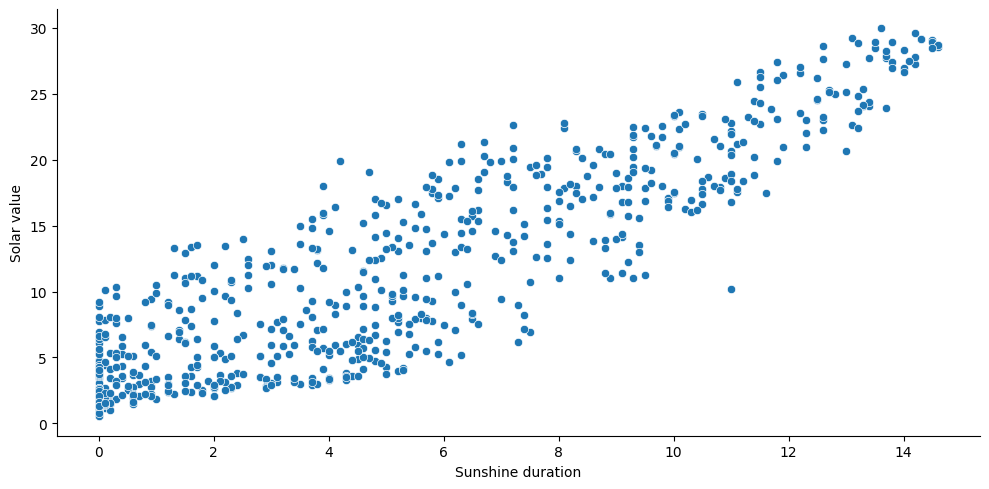

In [13]:
# create a scatter plot
sns.relplot(data=solar_data_clean, x="Sunshine duration", y="Solar value", aspect=2);

# Building a model 1
One of the simplest models to build is a linear model of the from $y=mx+c$. This is known as *linear regresssion*.

## Building a linear model based on Maximum temperature
The code in the box below:
* Defines the `input_features`, i.e. the $x$.
* Defines the `target`, i.e. the $y$.
* Creates the model: it finds the best values of $m$ and $c$ using the `LinearRegression().fit` command from the *sklearn* machine learning library.
* Displays the values of $m$ and $c$.

In [14]:
# Define the input features
input_features=['Maximum temperature']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)


Coefficients: 
 [0.95794243]
Intercept: 
 -4.156236243046489


The coefficient and intercept tell you that the `Maximum temperature` model is: $y = 0.958x - 4.156$, where $x$ is the maximum temperature and $y$ is the total solar radiation.

## Building linear models based on other features
Copy and paste the code below to build a linear model based on mean air temperature and sunshine duration.

In [15]:
# Build a model based on Mean air temperature
# Define the input features
input_features=['Mean air temperature']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

Coefficients: 
 [0.94676245]
Intercept: 
 0.13408758102223572


In [16]:
# Build a model based on Sunshine duration
# Define the input features
input_features=['Sunshine duration']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

Coefficients: 
 [1.69209259]
Intercept: 
 2.514149378375812


You should get $y = 0.947x + 0.134$ for the Mean air temperature model and a $y=1.692x+2.514$ for the Sunshine duration model.

## Comparing the models using new data

To compare the effectiveness of these models as predictors you could see how they perform on new data. The data for 2021 is attached to this notebook.
> Run the code below to import the data for 2021 and display two random rows.

In [17]:
# import data
new_solar_data = pd.read_csv('reading-climate-solar-21.csv')

# display to check
new_solar_data.sample(2, random_state=1)

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation
354,2021,12,21,1025.7,6.0,3.9,5.0,7,1.1,0.2,1.91
185,2021,7,5,1006.6,19.5,12.8,16.1,5,2.7,5.5,17.58


The models are:
* Maximum temperature model: $y = 0.958x - 4.156$
* Mean air temperature model: $y = 0.947x + 0.134$
* Sunshine duration model: $y = 1.692x + 2.514$

Use the boxes below to calculate predictions for the total solar radiation on these days using the different models. How do these predictions compare to the true values?

In [18]:
0.958*6 - 4.156

1.5919999999999996

# Pre-processing 2
Before using the new data from 2021 this needs to be pre-processed to remove any values of `x`.
> Run the code in the boxes below to clean the 2021 data.

In [19]:
new_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   365 non-null    int64  
 1   month                  365 non-null    int64  
 2   day                    365 non-null    int64  
 3   MSL pressure           365 non-null    float64
 4   Maximum temperature    365 non-null    float64
 5   Minimum temperature    365 non-null    float64
 6   Mean air temperature   365 non-null    float64
 7   Cloud cover            365 non-null    int64  
 8   Wind speed             365 non-null    float64
 9   Sunshine duration      365 non-null    float64
 10  Total solar radiation  365 non-null    object 
dtypes: float64(6), int64(4), object(1)
memory usage: 31.5+ KB


In [20]:
# convert the text feature to a numeric feature
new_solar_data['Solar value'] = pd.to_numeric(new_solar_data['Total solar radiation'], errors='coerce')

# remove any rows with missing values
new_solar_data_clean = new_solar_data.dropna()

# check the data
new_solar_data_clean

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation,Solar value
0,2021,1,1,1011.9,4.0,-2.0,1.0,8,0.8,0.0,0.99,0.99
1,2021,1,2,1017.0,4.1,-1.4,1.3,7,1.6,2.4,2.84,2.84
2,2021,1,3,1017.3,5.5,0.0,2.8,8,2.1,0.8,2.01,2.01
3,2021,1,4,1019.4,5.3,2.0,3.6,8,4.4,0.0,1.41,1.41
4,2021,1,5,1020.8,4.8,1.2,3.0,7,2.8,0.5,2.49,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021,12,27,992.6,11.9,6.0,8.9,8,2.0,0.0,1.23,1.23
361,2021,12,28,988.7,11.8,8.4,10.1,7,6.4,0.8,2.02,2.02
362,2021,12,29,1002.1,15.1,7.1,11.1,8,3.2,0.0,1.36,1.36
363,2021,12,30,1012.0,14.6,9.8,12.2,7,4.8,0.0,0.74,0.74


# Metrics for linear regression
To compare different models you need to measure them. The measures for evaluating the goodness of fit of different models are known as *metrics*.

The two most common metrics for linear regression models are: 
* Root Mean Square Error ($RMSE$): This is a measure of the average error when using the prediction compared to the true value.
* $R^2$: This is a measure of what proportion of the variation in the output feature is due to the change in the input feature for the model.

$RMSE$ has the same units as the output feature. $R^2$ is usually given as a percentage.

## Calculating the metrics for the model
The code in the box below is the same as the code above for building the model with additional lines added to caclulate the metrics. The code:
* Defines the `input_features`, i.e. the $x$.
* Defines the `target`, i.e. the $y$.
* Creates the model on the original data set: it finds the best values of $m$ and $c$ using the `LinearRegression().fit` command from the *sklearn* machine learning library.
* Displays the values of $m$ and $c$.
* Uses the model to create a list of predictions for the new data set.
* Displays the values of $RMSE$ and $R^2$ by comparing the predictions to the true values from the new data set. 

In [21]:
# Define the input features
input_features=['Maximum temperature']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(new_solar_data_clean[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(new_solar_data_clean[target], y_pred, squared=False))
print('R²: ',100*r2_score(new_solar_data_clean[target], y_pred))


Coefficients: 
 [0.95794243]
Intercept: 
 -4.156236243046489
RMSE:  5.509288062770621
R²:  43.551687577093745


> Copy the code into the boxes below and change it to find the metrics for your other models.

In [22]:
# Build a model and find the metrics


In [23]:
# Build a model and find the metrics

You should get $RMSE=6.30$ and $R^2=26.2$% for the Mean air temperature model. You should get $RMSE=3.50$ and $R^2=77.2$% for the Sunshine duration model.

# Building a model 2

## Using multiple input features
Linear regression models can have more than one input feature.

> Run the code in the box below to build and measure a model based on 

In [24]:
# Define the input features
input_features=['Maximum temperature', 'Mean air temperature']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(new_solar_data_clean[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(new_solar_data_clean[target], y_pred, squared=False))
print('R²: ',100*r2_score(new_solar_data_clean[target], y_pred))

Coefficients: 
 [ 2.16078812 -1.50612371]
Intercept: 
 -5.932390697231744
RMSE:  4.857063126223506
R²:  56.1259731128731


Use the code boxes below to build some other models based on multiple input features.

In [25]:
# Define the input features
input_features=['Sunshine duration', 'Mean air temperature']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(new_solar_data_clean[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(new_solar_data_clean[target], y_pred, squared=False))
print('R²: ',100*r2_score(new_solar_data_clean[target], y_pred))

Coefficients: 
 [1.46456453 0.43604507]
Intercept: 
 -1.3192842843317099
RMSE:  3.001291270291263
R²:  83.24762865910309


In [26]:
# Build a model and find the metrics# Define the input features
input_features=['Sunshine duration', 'Mean air temperature']
target='Solar value'

# create the model
linear_model = LinearRegression().fit(solar_data_clean[input_features], solar_data_clean[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(new_solar_data_clean[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(new_solar_data_clean[target], y_pred, squared=False))
print('R²: ',100*r2_score(new_solar_data_clean[target], y_pred))

Coefficients: 
 [1.46456453 0.43604507]
Intercept: 
 -1.3192842843317099
RMSE:  3.001291270291263
R²:  83.24762865910309


In [27]:
# Build a model and find the metrics

# Intepretting the results
- Which model created the best predictions? Give an explanation in context as to why the input features for this model are associated with solar radiation.
- Give an explanation why you might prefer a model with two input features over one with three input features when the model with two input features has slightly worse metrics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be5e6be7-b191-4ea6-9908-0168294c9ddc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>